In [ ]:
#https://medium.com/analytics-vidhya/python-code-on-holt-winters-forecasting-3843808a9873
!pip install statsmodels
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
aprn = pd.read_csv("/work/Download Data - STOCK_US_XNYS_APRN-3.csv")
traffic = [439544, 431428, 438406, 489471, 469408, 449945, 454281,421894,446790,473967,483814,500158,491911]
traffic.reverse()
aprn['traffic'] = traffic
paid_traffic = [123762, 182346, 129367, 169540, 75044, 75595, 101809, 149097, 103598, 216057, 127016, 122688, 121172]
paid_traffic.reverse()
aprn['paid_traffic'] = paid_traffic
aprn["Volume_int"] = aprn['Volume'].str.replace(",", "").astype(int)
aprn

,Date,Open,High,Low,Close,Volume,traffic,paid_traffic,Volume_int
0,04/2022,4.17,4.4800,3.680,4.12,"7,439,129",491911,121172,7439129
1,03/2022,5.25,5.6500,4.040,4.05,"16,416,578",500158,122688,16416578
2,02/2022,7.75,8.5800,4.820,5.23,"27,762,545",483814,127016,27762545
3,01/2022,6.78,9.2100,5.910,7.73,"31,716,637",473967,216057,31716637
4,12/2021,11.15,12.7599,6.150,6.73,"27,296,755",446790,103598,27296755
5,11/2021,9.16,11.3400,7.320,11.21,"20,569,493",421894,149097,20569493
6,10/2021,7.20,9.3600,6.550,9.15,"30,863,778",454281,101809,30863778
7,09/2021,4.09,7.6900,3.520,7.35,"60,141,946",449945,75595,60141946
8,08/2021,4.28,4.8299,3.660,4.16,"17,515,945",469408,75044,17515945
9,07/2021,4.30,4.6300,3.540,4.40,"19,971,308",489471,169540,19971308


<AxesSubplot:xlabel='Date'>

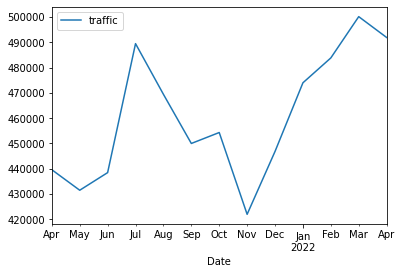

In [ ]:
apr = aprn.set_index('Date')
apr.index = pd.to_datetime(apr.index)
apr[['traffic']].plot()

In [ ]:
dates = ['01/15','02/15','03/15','04/15','05/15','06/15','07/15','08/15','09/15','10/15','11/15','12/15', '01/16','02/16','03/16','04/16','05/16', '06/16', '07/16', '08/16', '09/16', '10/16', '11/16', '12/16', '01/17', '02/17', '03/17', '04/17', '05/17', '06/17', '07/17', '08/17', '09/17', '10/17', '11/17', '12/17', '01/18', '02/18', '03/18', '04/18', '05/18','06/18','07/18','08/18','09/18','10/18','11/18','12/18','01/19','02/19','03/19','04/19','05/19','06/19','07/19','08/19','09/19','10/19','11/19','12/19', '01/20','02/20','03/20','04/20','05/20', '06/20', '07/20', '08/20', '09/20', '10/20', '11/20', '12/20', '01/21', '02/21', '03/21', '04/21', '05/21', '06/21', '07/21', '08/21', '09/21', '10/21', '11/21', '12/21', '01/22', '02/22', '03/22', '04/22']
traffics = [127077,127056,140762,171606,192150,205056,282106,286587,179467,291393,328283,449382,453683,464292,461738,738551,741434,749118,765850,763964,765121,769500,766245,925655,926447,913836,921090,938213,925346,929948,850356,918385,879926,860729,865999,868021,1236174,1267117,1172552,1148436,1146738,1132393,368076,1153919,1145270,1174026,1162032,1189736,1308995,1241749,1235213,1223525,1199659,635620,645115,625248,650484,638673,506211,532678,523482,550510,543114,455085,409300, 463314, 467943, 436575, 447100, 421514, 436075, 424890, 435653, 429859, 429081, 439544, 431428, 438406, 489471, 469408, 449945, 454281, 421894, 446790, 473967, 483814, 500158, 491911]
jegg = pd.DataFrame(data = {'dates': dates, 'traffic': traffics})
jegg['dates'] = jegg['dates'].str.replace("/", "/20")
jegg['dates'] = pd.to_datetime(jegg['dates'])
jegg.set_index('dates')

,traffic
dates,
2015-01-01,127077
2015-02-01,127056
2015-03-01,140762
2015-04-01,171606
2015-05-01,192150
...,...
2021-12-01,446790
2022-01-01,473967
2022-02-01,483814


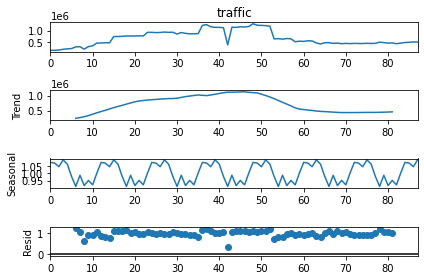

In [ ]:
decompose_result = seasonal_decompose(jegg['traffic'], model= 'multiplicative', period = 12)
decompose_result.plot();

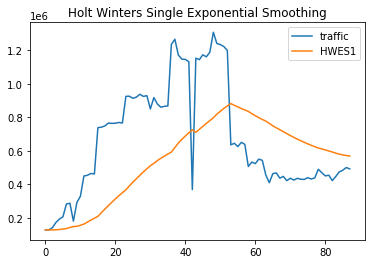

In [ ]:
jegg['HWES1'] = SimpleExpSmoothing(jegg['traffic']).fit(smoothing_level=(1/24),optimized=False,use_brute=True).fittedvalues
jegg[['traffic', 'HWES1']].plot(title= 'Holt Winters Single Exponential Smoothing');

/root/venv/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/root/venv/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


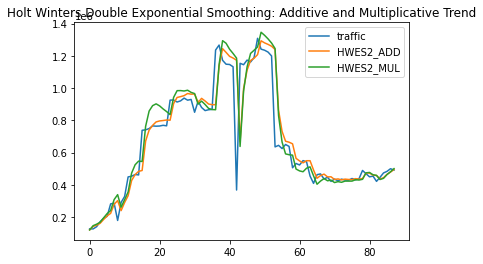

In [ ]:
jegg['HWES2_ADD'] = ExponentialSmoothing(jegg['traffic'],trend= 'add').fit().fittedvalues
jegg['HWES2_MUL'] = ExponentialSmoothing(jegg['traffic'],trend= 'mul').fit().fittedvalues
jegg[['traffic','HWES2_ADD','HWES2_MUL']].plot(title= 'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

/root/venv/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/root/venv/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


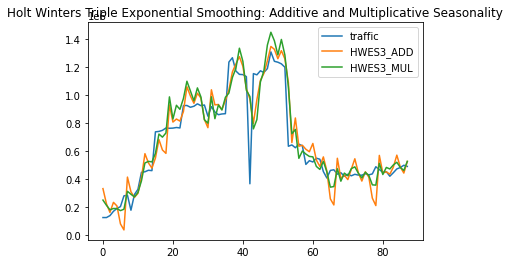

In [ ]:
jegg['HWES3_ADD'] = ExponentialSmoothing(jegg['traffic'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
jegg['HWES3_MUL'] = ExponentialSmoothing(jegg['traffic'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
jegg[['traffic','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

In [ ]:
train = jegg[:60]
test = jegg[60:]
fitted_model = ExponentialSmoothing(train[‘Thousands of Passengers’],trend=’mul’,seasonal=’mul’,seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(24)
train_airline[‘Thousands of Passengers’].plot(legend=True,label=’TRAIN’)
test_airline[‘Thousands of Passengers’].plot(legend=True,label=’TEST’,figsize=(6,4))
test_predictions.plot(legend=True,label=’PREDICTION’)
plt.title(‘Train, Test and Predicted Test using Holt Winters’)

(88, 7)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9e88faaf-ade4-4526-a9d5-3a022b266140' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>